In [107]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# For this example we will create synthetic assets

def generate_asset(mean, std, size, seed):
    np.random.seed(seed) 
    total_return = (mean+1) ** size - 1
    points = np.linspace(0, total_return, size)
    returns = points * np.random.normal(1, std, size)
    return returns

### The Sharpe Ratio

In [109]:
num_points = 50
red_mean = .03
blue_mean = .03
red_std = .5
blue_std = .05

red = generate_asset(red_mean, red_std, num_points, 1)
blue = generate_asset(blue_mean, blue_std, num_points, 2)
blue *= red[-1] / blue[-1]

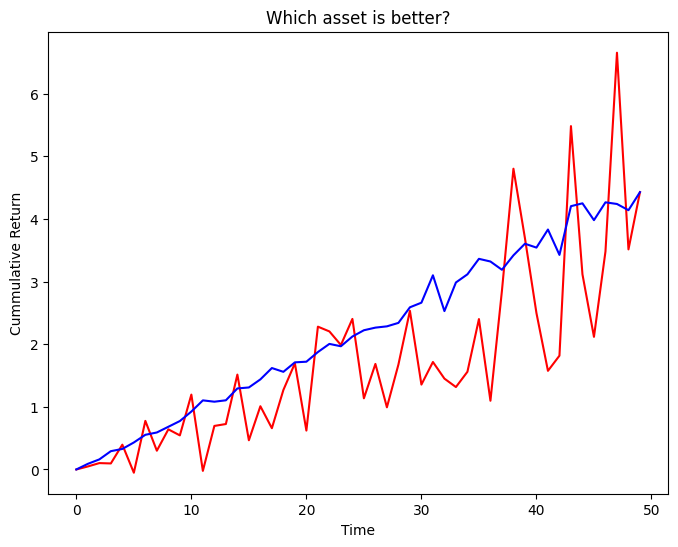

In [110]:
plt.figure(figsize=(8,6))
plt.title("Which asset is better?")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red')
plt.plot(blue, color='blue')
plt.show()

Would you rather invest in the red line or the blue line? They have the same total return.

In [111]:
print(f"Red total return: {round(red[-1], 2)}%")
print(f"Blue total return: {round(blue[-1], 2)}%")

Red total return: 4.43%
Blue total return: 4.43%


In [112]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")

Red Sharpe: 1.19
Blue Sharpe: 1.67


You're better off investing in the blue line because it has a higher sharpe ratio, which means that your portfolio is less volatile than the red portfolio.

In [113]:
num_points = 50
red_mean = .03
blue_mean = .03
green_mean = .03
red_std = 1
blue_std = .1
green_std = .01

red = generate_asset(red_mean, red_std, num_points, 1)
blue = generate_asset(blue_mean, blue_std, num_points, 2)
green = generate_asset(green_mean, green_std, num_points, 3)

blue *= red[-1] / blue[-1]
green *= red[-1] / green[-1]

In [114]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()
green_sharpe = green.mean() / green.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")
print(f"Green Sharpe: {round(green_sharpe, 2)}")

Red Sharpe: 0.81
Blue Sharpe: 1.63
Green Sharpe: 1.7


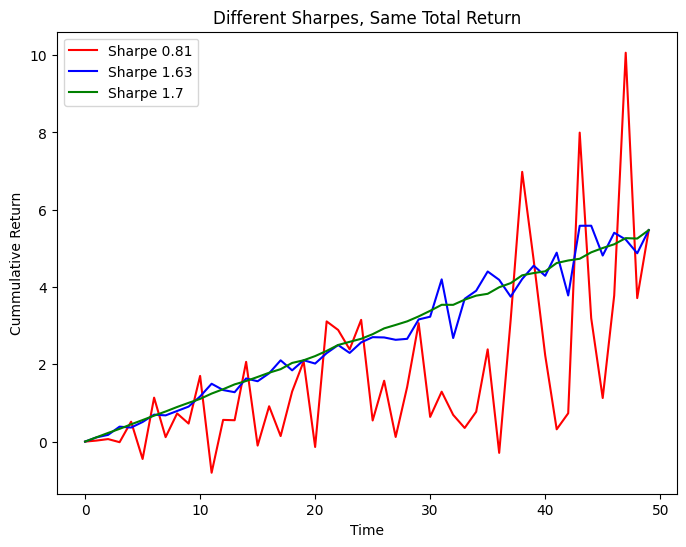

In [115]:
plt.figure(figsize=(8,6))
plt.title("Different Sharpes, Same Total Return")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.plot(green, color='green', label=f"Sharpe {round(green_sharpe,2)}")
plt.legend()
plt.show()

You'll notice that as the sharpe ratio increases, the smoothness of the asset improves.

### Diversification

In [116]:
num_points = 50
red_mean = .03
blue_mean = .03
red_std = .25
blue_std = .25

red = generate_asset(red_mean, red_std, num_points, 10)
blue = generate_asset(blue_mean, blue_std, num_points, 11)
blue *= red[-1] / blue[-1]

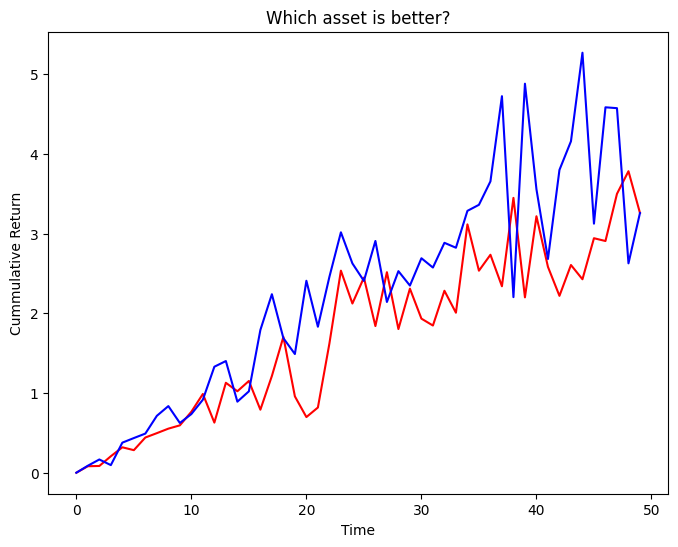

In [117]:
plt.figure(figsize=(8,6))
plt.title("Which asset is better?")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red')
plt.plot(blue, color='blue')
plt.show()

In this case, both the red line and the blue line have almost the exact same sharpe ratio. So you're fine investing in either one.

In [118]:
green = (red + blue) / 2

In [119]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()
green_sharpe = green.mean() / green.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")
print(f"Green Sharpe: {round(green_sharpe, 2)}")

Red Sharpe: 1.64
Blue Sharpe: 1.63
Green Sharpe: 1.71


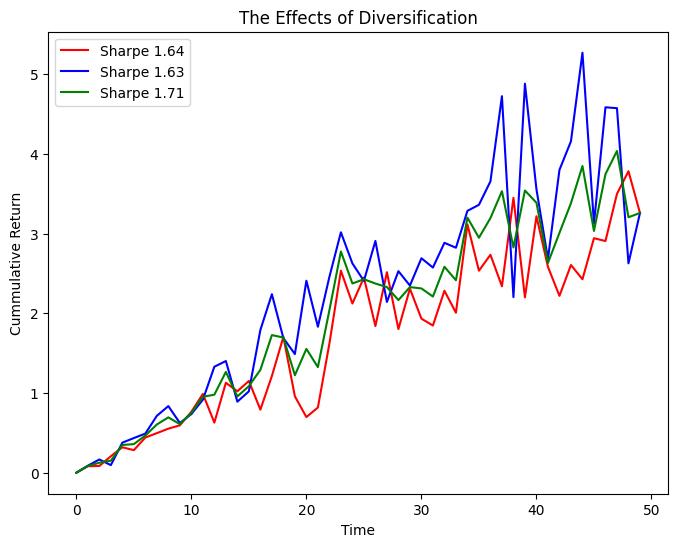

In [120]:
plt.figure(figsize=(8,6))
plt.title("The Effects of Diversification")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.plot(green, color='green', label=f"Sharpe {round(green_sharpe,2)}")
plt.legend()
plt.show()

But, we can actually combine the two assets to create a new asset. We do this by taking the average of the red and the blue line to create the green line. This new asset is an example of an equal weight portfolio and is an example of how combining assets can lead to better properties. In this case the sharpe ratio of the combined asset is better than both of its constituents, but this is not always the case.

### Leverage

In [121]:
num_points = 50
red_mean = .03
blue_mean = .03
red_std = .5
blue_std = .05

red = generate_asset(red_mean, red_std, num_points, 1)
blue = generate_asset(blue_mean, blue_std, num_points, 2)

In [122]:
print(f"Red total return: {round(red[-1], 2)}%")
print(f"Blue total return: {round(blue[-1], 2)}%")

Red total return: 4.43%
Blue total return: 3.4%


In [123]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")

Red Sharpe: 1.19
Blue Sharpe: 1.67


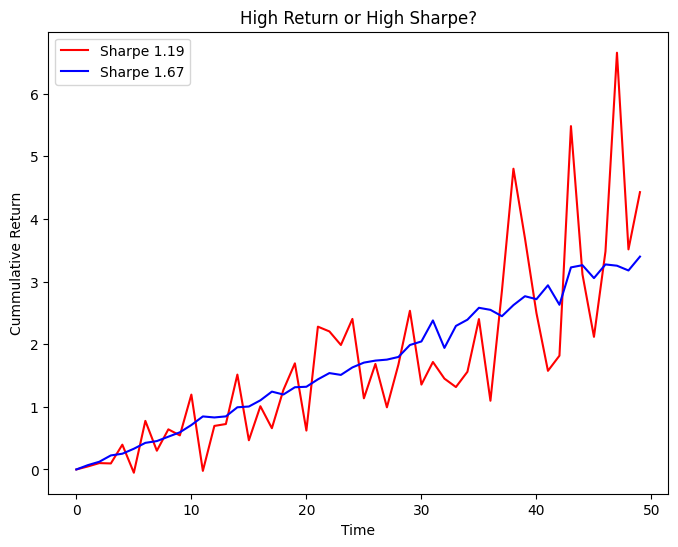

In [124]:
plt.figure(figsize=(8,6))
plt.title("High Return or High Sharpe?")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.legend()
plt.show()

In this case, the red line has a higher total return than the blue line, but the blue line has a higher sharpe. Which asset would you rather invest in?

In [125]:
lever_2 = blue * 2
lever_3 = blue * 3

lever_2_sharpe = lever_2.mean() / lever_2.std()
lever_3_sharpe = lever_3.mean() / lever_3.std()

print(f"2 X Blue Sharpe: {round(lever_2_sharpe, 2)}")
print(f"3 X Blue Sharpe: {round(lever_3_sharpe, 2)}")

2 X Blue Sharpe: 1.67
3 X Blue Sharpe: 1.67


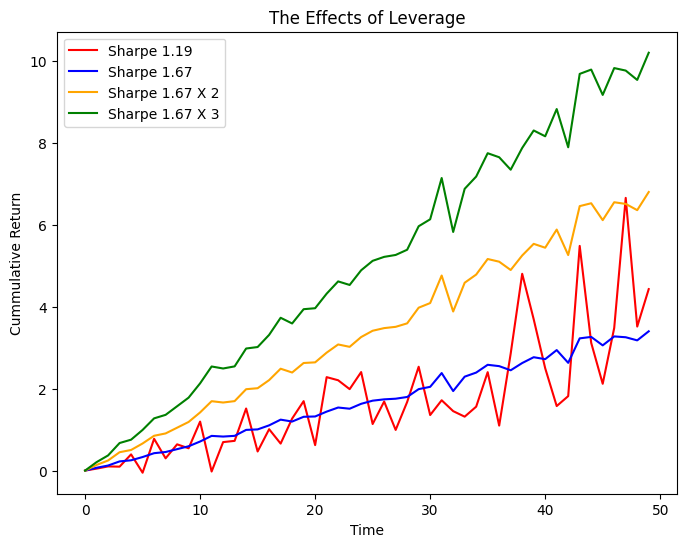

In [126]:
plt.figure(figsize=(8,6))
plt.title("The Effects of Leverage")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.plot(lever_2, color='orange', label=f"Sharpe {round(lever_2_sharpe,2)} X 2")
plt.plot(lever_3, color='green', label=f"Sharpe {round(lever_3_sharpe,2)} X 3")
plt.legend()
plt.show()

Leverage allows us to still invest in the higher sharpe asset but by borrowing money to invest more in the blue line, we are able to outperform the red line while still having a higher sharpe.